## CRIPS-DM
Para nuestro proyecto se implementara la metolodiga CRIPS-DM de manera agil, la cual se enfoca en las siguientes fases:

### Business Understanding

1. Identificar si un paciente sera propenso a tener un infarto.
2. Identifiar las variables relevantes para detectar un infarto.
3. Generar un plan de contingencia dadas las variables identificadas.

### Data unsertanding

1. 
2. 
3. 

### Data preparation

1. Que variables presentan datos vacios?
2. Determinar si se puede aplicar imputacion de media para no perder informacion de los pacientes con infartos?
3. Si los pacientes con infartos son menores a los pacientes sanos, el bmi seria considerado como variable relevante?

### Modeling

1. Determinar si solo un arbol el capaz de identificar las variables mas relevantes.
2. Si se implenta un arbol de decisoin 
3. 

### Evaluation

1. 
2. 
3. 

### Deployment

1. 
2. 
3. 

<img title="a title" alt="Alt text" src="../assets/crisp-dm.png">

# Business Understanding

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

In [7]:
data.shape

(5110, 12)

In [8]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [19]:
data[data['bmi'].isna()]['stroke'].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [11]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/tmp/ipykernel_1595/104075714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


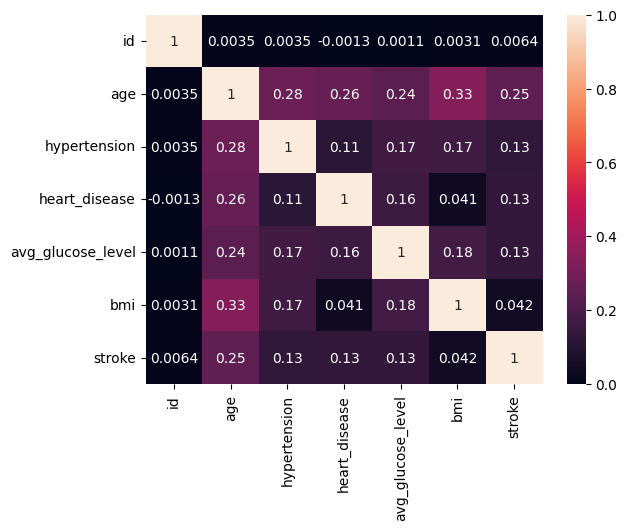

In [16]:
sns.heatmap(data.corr(), annot=True)
plt.show()

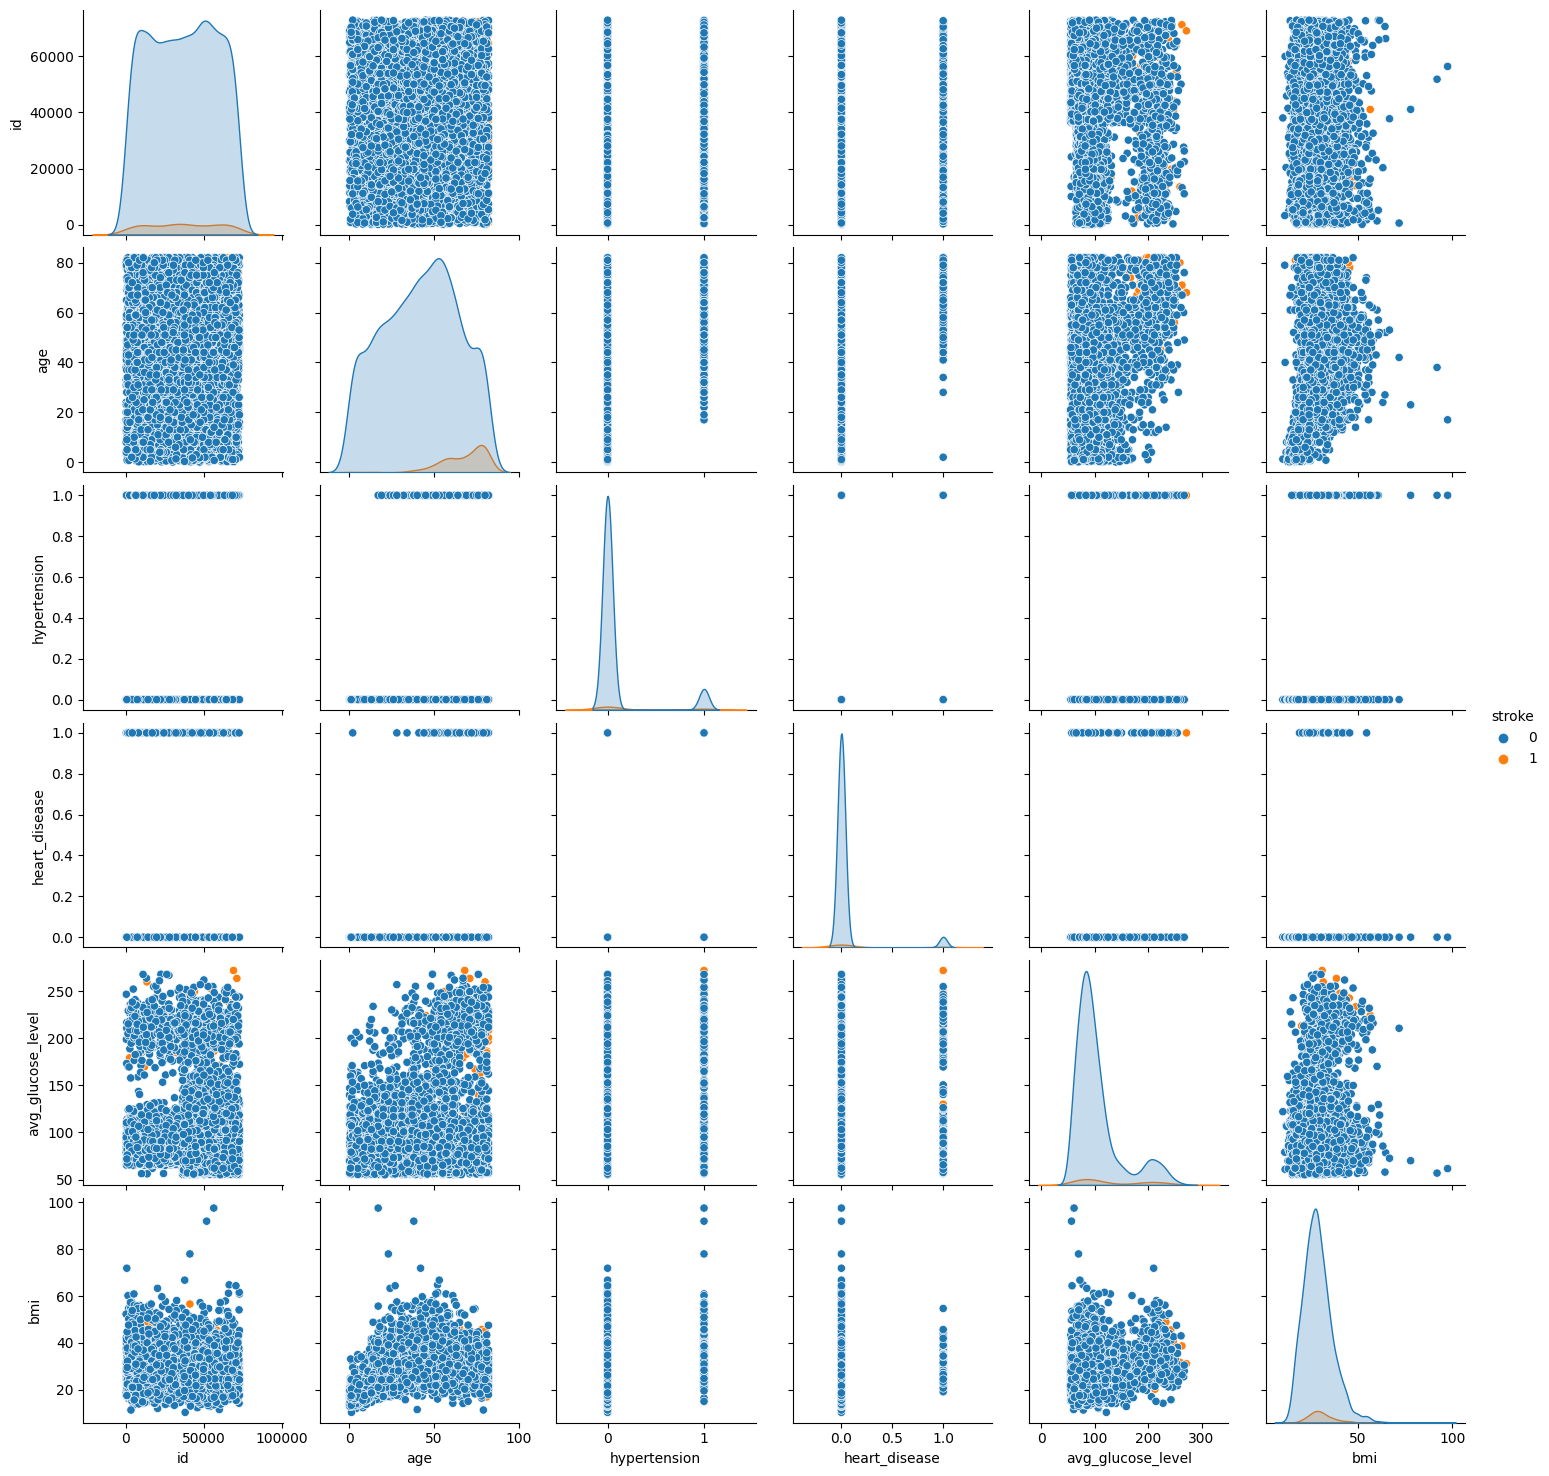

In [18]:
sns.pairplot(data, hue="stroke")

In [20]:
data2 = data.fillna(data.mean())

/tmp/ipykernel_1595/953080936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2 = data.fillna(data.mean())


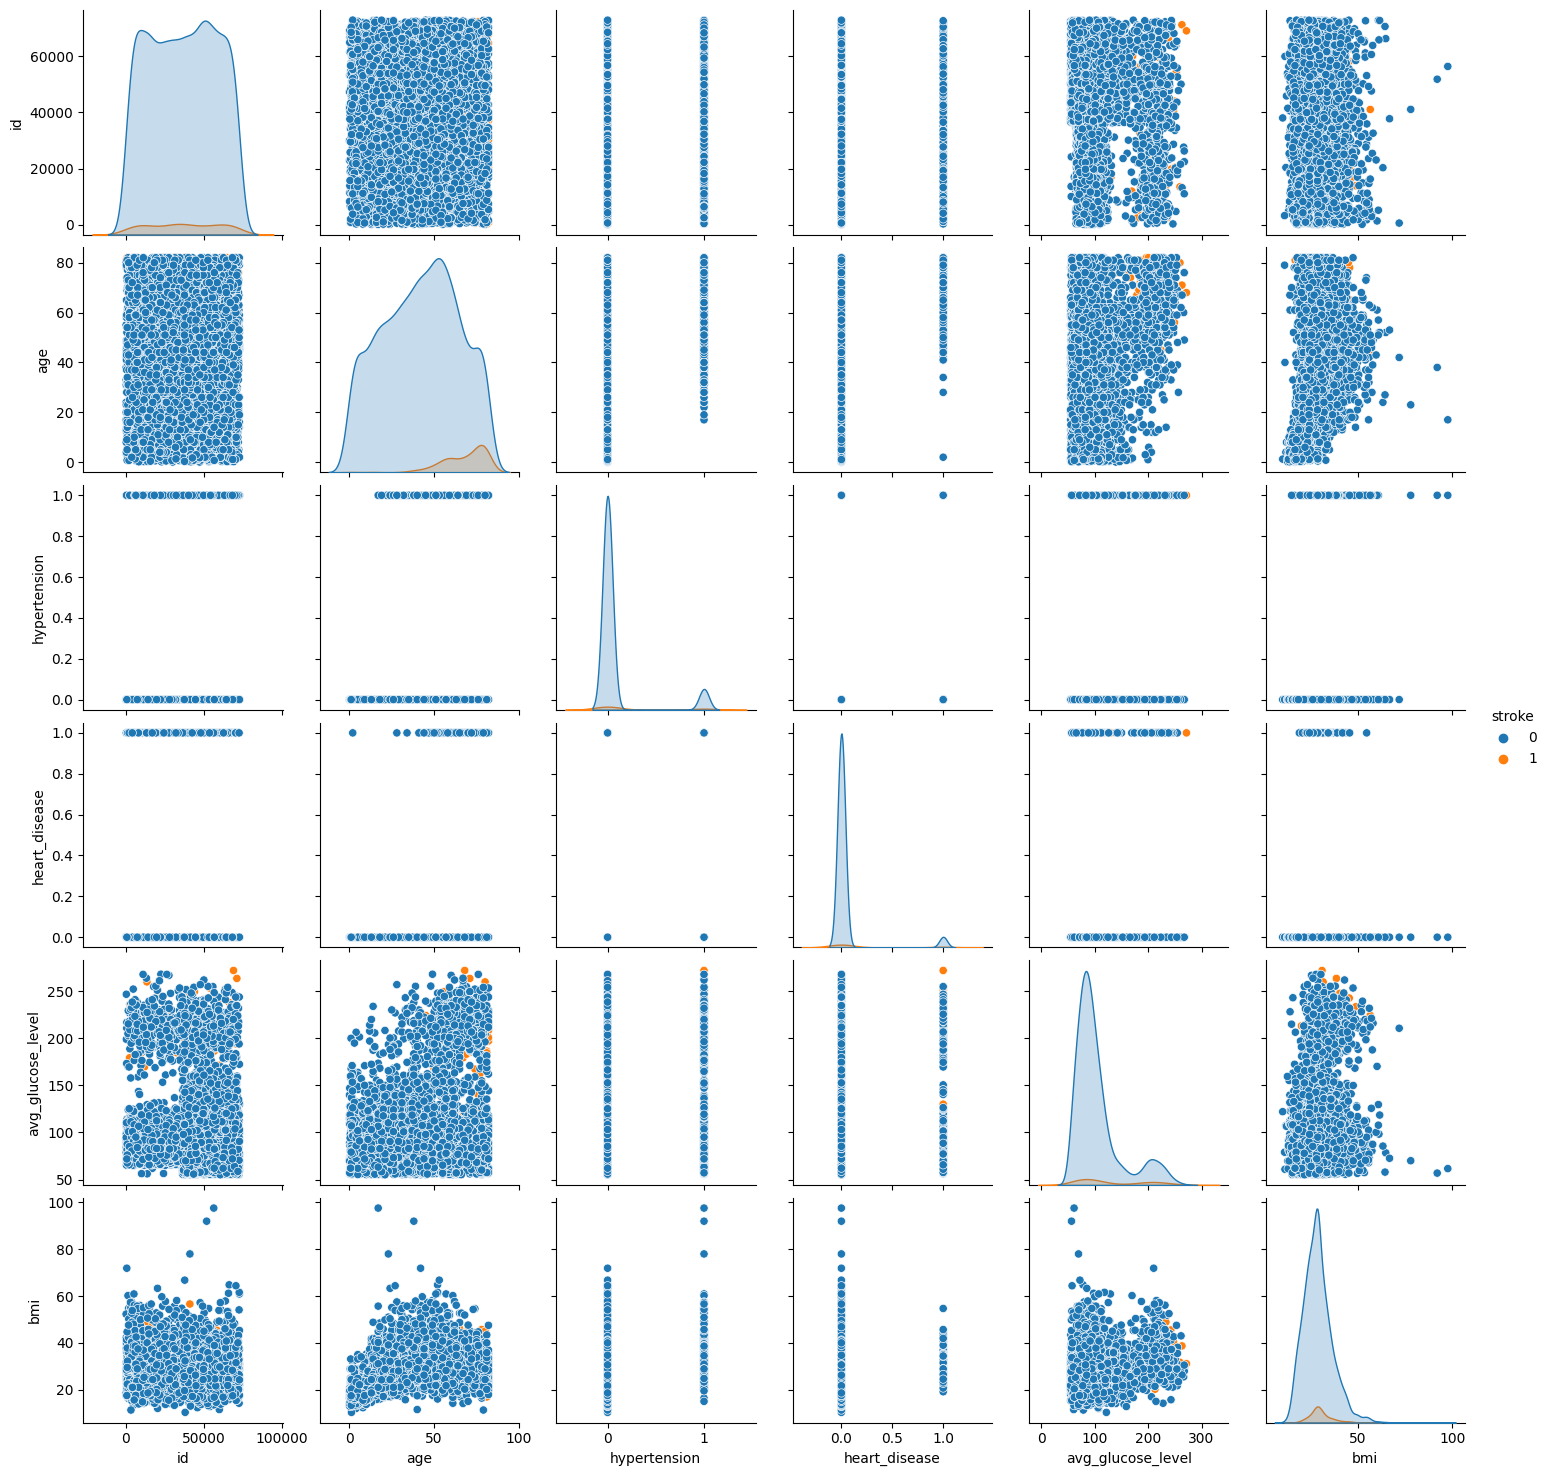

In [21]:
sns.pairplot(data2, hue="stroke")

In [22]:
transform_columns = ['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [24]:
data2.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000
